### Importing Relevant Packages

In [1]:
%pip install statsmodels 
%pip install seaborn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2023.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = False)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

C:\Users\heber\AppData\Local\Temp\ipykernel_6652\1907149261.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')




### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [6]:
df['wn'] = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

C:\Users\heber\AppData\Local\Temp\ipykernel_6652\837445266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))


In [7]:
df.describe()

,market_value,wn
count,6200.000000,6200.000000
mean,1271.617281,1276.936592
std,466.092926,464.858855
min,438.920000,-382.961724
25%,987.487500,962.031467
50%,1226.600000,1275.984272
75%,1450.660000,1594.086375
max,2555.240000,2912.617830


c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

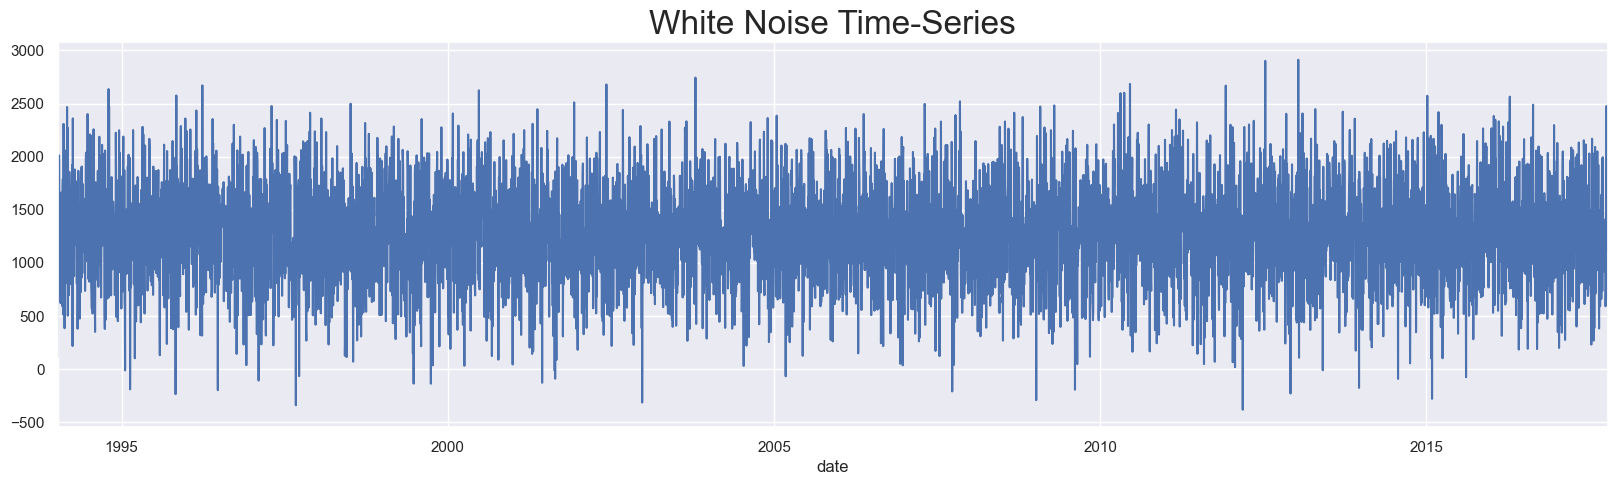

In [8]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\heber\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

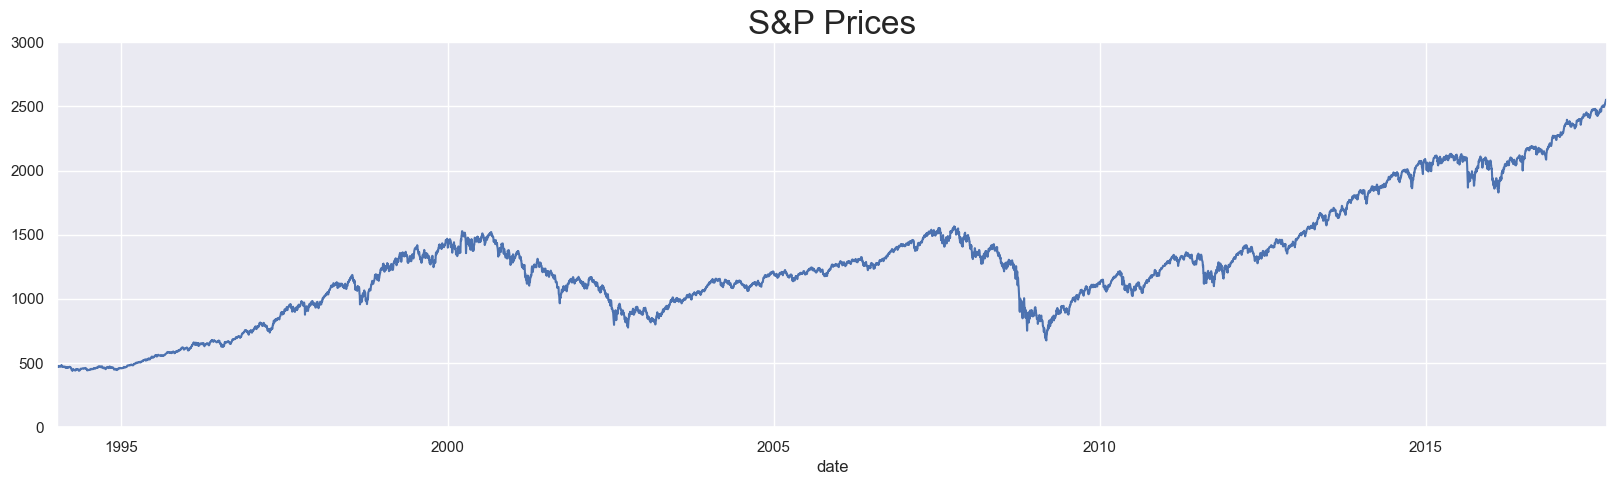

In [10]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,3000)
plt.show()

### Random Walk

In [ ]:
rw = pd.read_csv("RandWalk.csv") #FALTA EL ARCHIVO Randwalk.csv
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [12]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [13]:
df['rw'] = rw.price

In [14]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1059.089464,1122.139662
1994-01-10,475.27,885.137922,1080.347860
1994-01-11,474.13,680.919810,1082.095245
1994-01-12,474.17,1555.430981,1083.639265
1994-01-13,472.47,1157.200035,1067.146255


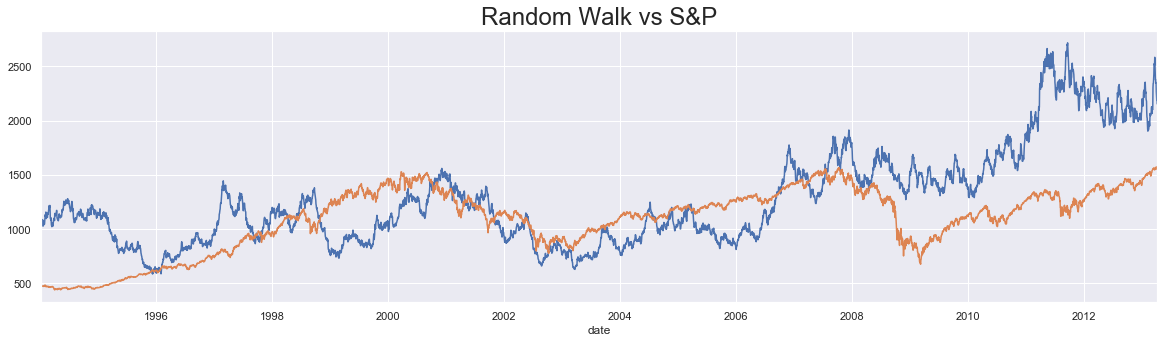

In [15]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [11]:
sts.adfuller(df.market_value)
#Ho = Raiz unitaria (No es estacionario)
#Ha = No hay raiz unitaria (Es estacionario)

(0.26382326025824293,
 0.9756224621271018,
 10,
 6189,
 {'1%': -3.4314070389893594,
  '5%': -2.8620071166848136,
  '10%': -2.5670186433785376},
 49660.42052200302)

In [12]:
sts.adfuller(df.wn)
#Ho = Raiz unitaria (No es estacionario)
#Ha = No hay raiz unitaria (Es estacionario)

(-78.33310481112343,
 0.0,
 0,
 6199,
 {'1%': -3.4314053331058534,
  '5%': -2.8620063629706967,
  '10%': -2.567018242158026},
 93215.89002375919)

In [18]:
sts.adfuller(df.rw)

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

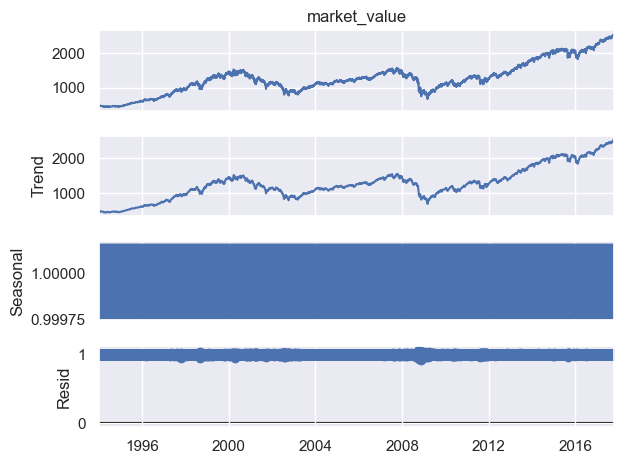

In [13]:
#seasonal_decompose se utiliza para descomponer una serie temporal en sus componentes: tendencia, estacionalidad y residuos
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

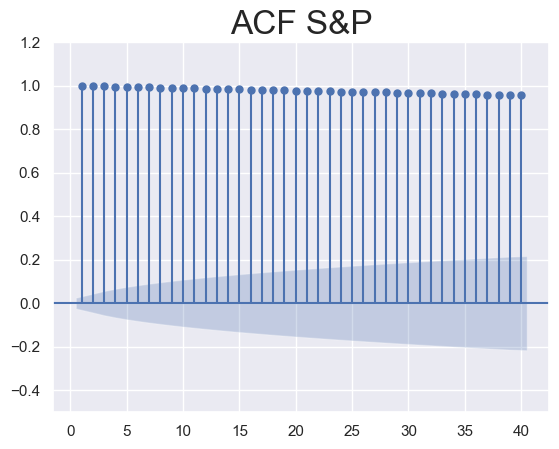

In [15]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.ylim(-0.5,1.2)
plt.show()

### PACF

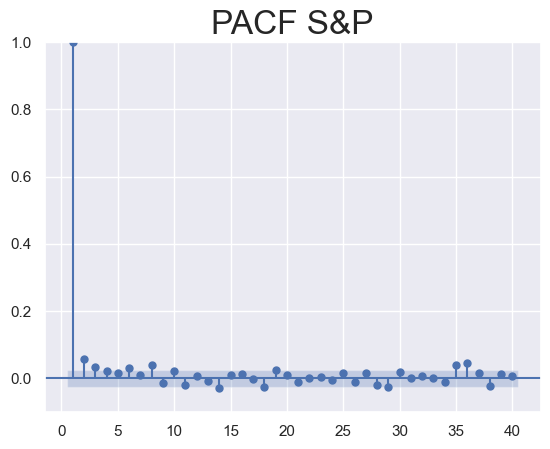

In [18]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.ylim(-0.1,1)
plt.show()

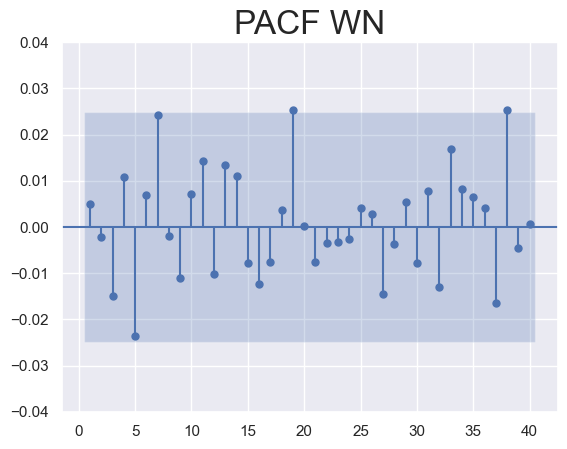

In [21]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.ylim(-0.04,0.04)
plt.show()